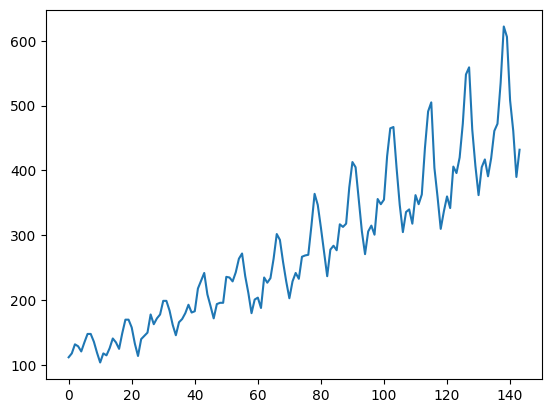

In [1]:
import pandas
import matplotlib.pyplot as plt
df = pandas.read_csv("data/airline-passengers.csv", usecols=[1])
plt.plot(df)
plt.show()

In [2]:
%pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

2024-06-24 05:39:53.934094: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-24 05:39:53.936600: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-24 05:39:53.968481: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-24 05:39:54.737931: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
dataset = df.values
dataset = dataset.astype('float32')

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [7]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [9]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

LSTM

In [11]:
# create and fit the LSTM network
model = keras.Sequential()
model.add(keras.Input((1, look_back)))
model.add(keras.layers.LSTM(4))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 1s - 10ms/step - loss: 0.0555
Epoch 2/100
94/94 - 0s - 1ms/step - loss: 0.0302
Epoch 3/100
94/94 - 0s - 1ms/step - loss: 0.0216
Epoch 4/100
94/94 - 0s - 929us/step - loss: 0.0193
Epoch 5/100
94/94 - 0s - 959us/step - loss: 0.0181
Epoch 6/100
94/94 - 0s - 967us/step - loss: 0.0173
Epoch 7/100
94/94 - 0s - 1ms/step - loss: 0.0165
Epoch 8/100
94/94 - 0s - 1ms/step - loss: 0.0157
Epoch 9/100
94/94 - 0s - 918us/step - loss: 0.0149
Epoch 10/100
94/94 - 0s - 901us/step - loss: 0.0141
Epoch 11/100
94/94 - 0s - 923us/step - loss: 0.0132
Epoch 12/100
94/94 - 0s - 871us/step - loss: 0.0123
Epoch 13/100
94/94 - 0s - 878us/step - loss: 0.0114
Epoch 14/100
94/94 - 0s - 929us/step - loss: 0.0104
Epoch 15/100
94/94 - 0s - 953us/step - loss: 0.0095
Epoch 16/100
94/94 - 0s - 983us/step - loss: 0.0085
Epoch 17/100
94/94 - 0s - 1ms/step - loss: 0.0075
Epoch 18/100
94/94 - 0s - 946us/step - loss: 0.0066
Epoch 19/100
94/94 - 0s - 899us/step - loss: 0.0058
Epoch 20/100
94/94 - 0s - 923us/

In [12]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict_orig = scaler.inverse_transform(trainPredict)
trainY_orig = scaler.inverse_transform([trainY])
testPredict_orig = scaler.inverse_transform(testPredict)
testY_orig = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY_orig[0], trainPredict_orig[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY_orig[0], testPredict_orig[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Score: 22.93 RMSE
Test Score: 51.42 RMSE


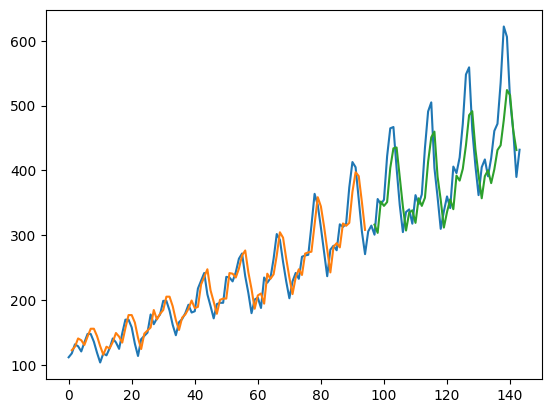

In [13]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict_orig
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict_orig
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

GRU

In [14]:
# create and fit the GRU network
model = keras.Sequential()
model.add(keras.Input((1, look_back)))
model.add(keras.layers.GRU(4))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 1s - 10ms/step - loss: 0.0269
Epoch 2/100
94/94 - 0s - 1ms/step - loss: 0.0128
Epoch 3/100
94/94 - 0s - 957us/step - loss: 0.0108
Epoch 4/100
94/94 - 0s - 943us/step - loss: 0.0091
Epoch 5/100
94/94 - 0s - 958us/step - loss: 0.0076
Epoch 6/100
94/94 - 0s - 927us/step - loss: 0.0064
Epoch 7/100
94/94 - 0s - 920us/step - loss: 0.0054
Epoch 8/100
94/94 - 0s - 915us/step - loss: 0.0046
Epoch 9/100
94/94 - 0s - 904us/step - loss: 0.0038
Epoch 10/100
94/94 - 0s - 887us/step - loss: 0.0033
Epoch 11/100
94/94 - 0s - 908us/step - loss: 0.0028
Epoch 12/100
94/94 - 0s - 930us/step - loss: 0.0025
Epoch 13/100
94/94 - 0s - 1ms/step - loss: 0.0024
Epoch 14/100
94/94 - 0s - 983us/step - loss: 0.0022
Epoch 15/100
94/94 - 0s - 1ms/step - loss: 0.0021
Epoch 16/100
94/94 - 0s - 1ms/step - loss: 0.0021
Epoch 17/100
94/94 - 0s - 1ms/step - loss: 0.0020
Epoch 18/100
94/94 - 0s - 1ms/step - loss: 0.0021
Epoch 19/100
94/94 - 0s - 1ms/step - loss: 0.0020
Epoch 20/100
94/94 - 0s - 1ms/step -

In [15]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict_orig = scaler.inverse_transform(trainPredict)
trainY_orig = scaler.inverse_transform([trainY])
testPredict_orig = scaler.inverse_transform(testPredict)
testY_orig = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY_orig[0], trainPredict_orig[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY_orig[0], testPredict_orig[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train Score: 22.63 RMSE
Test Score: 50.33 RMSE


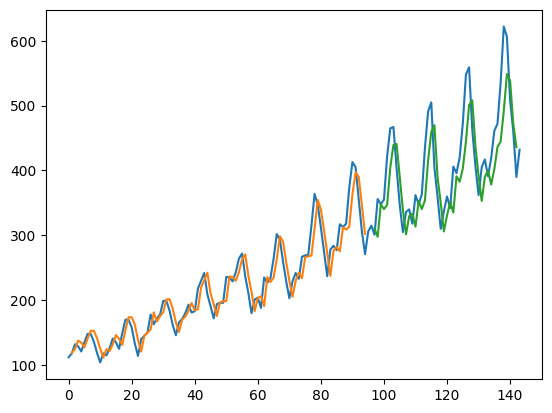

In [16]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict_orig
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict_orig
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

GRU MML

In [17]:
import keras_mml

In [18]:
# create and fit the GRU network
model = keras.Sequential()
model.add(keras.Input((1, look_back)))
model.add(keras_mml.layers.GRUMML(4))
model.add(keras.layers.Dense(4))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - 18ms/step - loss: 0.0257
Epoch 2/100
94/94 - 0s - 1ms/step - loss: 0.0203
Epoch 3/100
94/94 - 0s - 1ms/step - loss: 0.0199
Epoch 4/100
94/94 - 0s - 1ms/step - loss: 0.0201
Epoch 5/100
94/94 - 0s - 1ms/step - loss: 0.0201
Epoch 6/100
94/94 - 0s - 1ms/step - loss: 0.0195
Epoch 7/100
94/94 - 0s - 1ms/step - loss: 0.0193
Epoch 8/100
94/94 - 0s - 1ms/step - loss: 0.0189
Epoch 9/100
94/94 - 0s - 1ms/step - loss: 0.0181
Epoch 10/100
94/94 - 0s - 1ms/step - loss: 0.0187
Epoch 11/100
94/94 - 0s - 1ms/step - loss: 0.0181
Epoch 12/100
94/94 - 0s - 1ms/step - loss: 0.0175
Epoch 13/100
94/94 - 0s - 1ms/step - loss: 0.0177
Epoch 14/100
94/94 - 0s - 1ms/step - loss: 0.0171
Epoch 15/100
94/94 - 0s - 1ms/step - loss: 0.0162
Epoch 16/100
94/94 - 0s - 1ms/step - loss: 0.0157
Epoch 17/100
94/94 - 0s - 1ms/step - loss: 0.0145
Epoch 18/100
94/94 - 0s - 1ms/step - loss: 0.0135
Epoch 19/100
94/94 - 0s - 1ms/step - loss: 0.0121
Epoch 20/100
94/94 - 0s - 1ms/step - loss: 0.0115
Epoch 21

In [19]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict_orig = scaler.inverse_transform(trainPredict)
trainY_orig = scaler.inverse_transform([trainY])
testPredict_orig = scaler.inverse_transform(testPredict)
testY_orig = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY_orig[0], trainPredict_orig[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY_orig[0], testPredict_orig[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7fc648366ef0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Score: 23.56 RMSE
Test Score: 48.35 RMSE


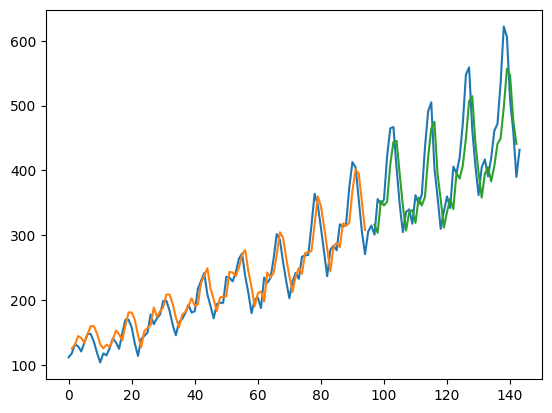

In [20]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict_orig
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict_orig
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

LRU MML

In [21]:
# create and fit the GRU network
model = keras.Sequential()
model.add(keras.Input((1, look_back)))
model.add(keras_mml.layers.LRUMML(4, 8))
model.add(keras.layers.Dense(4))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - 26ms/step - loss: 0.0451
Epoch 2/100
94/94 - 0s - 2ms/step - loss: 0.0128
Epoch 3/100
94/94 - 0s - 2ms/step - loss: 0.0112
Epoch 4/100
94/94 - 0s - 2ms/step - loss: 0.0087
Epoch 5/100
94/94 - 0s - 2ms/step - loss: 0.0063
Epoch 6/100
94/94 - 0s - 2ms/step - loss: 0.0045
Epoch 7/100
94/94 - 0s - 2ms/step - loss: 0.0037
Epoch 8/100
94/94 - 0s - 2ms/step - loss: 0.0026
Epoch 9/100
94/94 - 0s - 2ms/step - loss: 0.0027
Epoch 10/100
94/94 - 0s - 2ms/step - loss: 0.0025
Epoch 11/100
94/94 - 0s - 2ms/step - loss: 0.0025
Epoch 12/100
94/94 - 0s - 2ms/step - loss: 0.0027
Epoch 13/100
94/94 - 0s - 2ms/step - loss: 0.0025
Epoch 14/100
94/94 - 0s - 1ms/step - loss: 0.0023
Epoch 15/100
94/94 - 0s - 2ms/step - loss: 0.0027
Epoch 16/100
94/94 - 0s - 1ms/step - loss: 0.0022
Epoch 17/100
94/94 - 0s - 2ms/step - loss: 0.0033
Epoch 18/100
94/94 - 0s - 1ms/step - loss: 0.0030
Epoch 19/100
94/94 - 0s - 2ms/step - loss: 0.0022
Epoch 20/100
94/94 - 0s - 1ms/step - loss: 0.0024
Epoch 21

In [22]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict_orig = scaler.inverse_transform(trainPredict)
trainY_orig = scaler.inverse_transform([trainY])
testPredict_orig = scaler.inverse_transform(testPredict)
testY_orig = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY_orig[0], trainPredict_orig[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY_orig[0], testPredict_orig[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train Score: 24.72 RMSE
Test Score: 52.54 RMSE


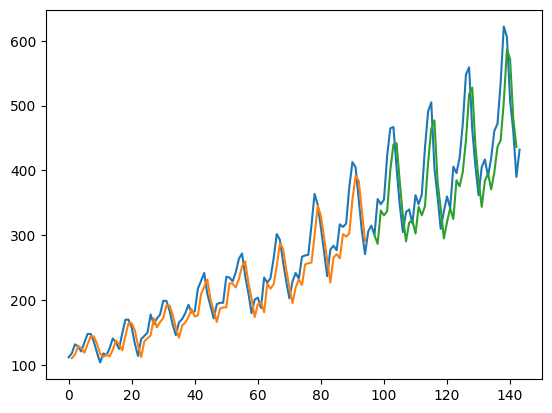

In [23]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict_orig
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict_orig
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()